In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Datos

In [2]:
# Cargamos los datos
df = pd.read_csv('gtzan/features_3_sec.csv')
df[:30]

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
5,blues.00000.5.wav,66149,0.376670,0.089702,0.132618,0.003583,1994.915219,211700.619569,2152.767854,74263.873102,...,31.448069,-3.448373,34.284130,-0.416165,40.791092,-3.649625,32.457901,3.025218,28.892687,blues
6,blues.00000.6.wav,66149,0.379909,0.088827,0.130335,0.003166,1962.150096,177443.070045,2146.503479,98020.541422,...,33.954071,-2.068194,25.623655,1.428141,47.957699,-3.267124,39.382240,3.276939,25.999132,blues
7,blues.00000.7.wav,66149,0.331880,0.092119,0.140600,0.002546,1701.890924,35678.130616,1979.387612,36670.725886,...,38.456211,-3.637886,24.530296,-0.105148,26.716150,-2.016985,23.150423,0.210787,42.512966,blues
8,blues.00000.8.wav,66149,0.347877,0.094209,0.133130,0.002538,1746.473502,138073.931244,1887.619723,117069.920049,...,44.311455,-4.370029,29.873167,2.114592,33.843155,-2.264663,80.812393,3.758598,97.618835,blues
9,blues.00000.9.wav,66149,0.358061,0.082957,0.115312,0.001846,1763.948942,61493.423121,1874.195710,51944.921435,...,43.967834,-3.448304,48.671944,0.099792,41.839546,-7.677177,96.253654,0.791776,40.416420,blues


In [3]:
# Cargar el CSV
original_df = pd.read_csv('gtzan/features_3_sec.csv')

# Remover la parte del nombre del archivo que indica el fragmento (.0, .1, etc.)
original_df['filename'] = original_df['filename'].apply(lambda x: '.'.join(x.split('.')[:-2]) + '.wav')

# Crear un índice para cada fragmento
original_df['fragment'] = original_df.groupby('filename').cumcount()

# Separar las características, sumando 'length' y tomando el mismo 'label'
# Para cada archivo, se sumarán las longitudes, y las características se "extienden" en nuevas columnas.
agg_dict = {
    'length': 'sum',
    'label': 'first'
}

# Agregar cada columna de features con un nombre único por fragmento
features = [col for col in original_df.columns if col not in ['filename', 'length', 'label', 'fragment']]
for feature in features:
    agg_dict[feature] = lambda x: x.tolist()

# Agrupar por filename y realizar las agregaciones
grouped = original_df.groupby('filename').agg(agg_dict)

# Crear nuevas columnas para cada fragmento y feature
new_columns = []
for feature in features:
    for i in range(10):  # Sabemos que hay 10 fragmentos por archivo
        new_columns.append(f'{feature}_{i}')

flattened_data = []
for index, row in grouped.iterrows():
    row_data = [index, row['length'], row['label']]  # Agregar filename, length y label
    for feature in features:
        row_data.extend(row[feature])  # Extender cada feature de la lista
    flattened_data.append(row_data)

# Crear el nuevo DataFrame con los nombres de columnas adecuados
df = pd.DataFrame(flattened_data, columns=['filename', 'length', 'label'] + new_columns)

df.head()

,filename,length,label,chroma_stft_mean_0,chroma_stft_mean_1,chroma_stft_mean_2,chroma_stft_mean_3,chroma_stft_mean_4,chroma_stft_mean_5,chroma_stft_mean_6,...,mfcc20_var_0,mfcc20_var_1,mfcc20_var_2,mfcc20_var_3,mfcc20_var_4,mfcc20_var_5,mfcc20_var_6,mfcc20_var_7,mfcc20_var_8,mfcc20_var_9
0,blues.00000.wav,661490,blues,0.335406,0.343065,0.346815,0.363639,0.335579,0.376670,0.379909,...,43.771767,59.943081,33.105122,32.023678,29.146694,28.892687,25.999132,42.512966,97.618835,40.416420
1,blues.00001.wav,661490,blues,0.402401,0.345507,0.338119,0.330751,0.348027,0.329435,0.343666,...,21.973501,34.120010,96.283142,37.799568,31.121618,49.899857,47.496124,47.172031,59.863949,18.163389
2,blues.00002.wav,661490,blues,0.366614,0.384461,0.379043,0.397078,0.360683,0.364035,0.299589,...,23.373898,27.588282,35.118946,27.857132,38.718266,32.147289,22.517632,22.927328,30.644648,35.834270
3,blues.00003.wav,661490,blues,0.369137,0.391587,0.421994,0.443950,0.400731,0.396703,0.432638,...,27.378294,37.484596,17.021473,39.182232,30.943306,34.000751,25.768145,16.252850,40.156540,18.358120
4,blues.00004.wav,661490,blues,0.307888,0.297016,0.344321,0.273951,0.275917,0.347598,0.281015,...,74.256371,56.032509,31.137188,59.777668,75.732666,55.011505,24.497927,33.740078,34.280636,35.870258


In [4]:
df = df.dropna()

# Autoencoder

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [7]:
# Normalizar los datos
data = df.drop(columns=['filename', 'length', 'label']).values
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Dividir los datos en conjuntos de entrenamiento y validación
data_train, data_val = train_test_split(data, test_size=0.2, random_state=42)

# Convertir a tensores
data_train_tensor = torch.tensor(data_train, dtype=torch.float32).to(device)
data_val_tensor = torch.tensor(data_val, dtype=torch.float32).to(device)

# Crear TensorDatasets para entrenamiento y validación
train_dataset = TensorDataset(data_train_tensor, data_train_tensor)
val_dataset = TensorDataset(data_val_tensor, data_val_tensor)

# DataLoader para entrenamiento y validación
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [8]:
# Autoencoder
class AE(nn.Module):
    def __init__(self, vsize, hsize):
        super(AE, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(vsize, hsize),
            nn.Tanh()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(hsize, vsize),
            nn.Tanh()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded



In [9]:
# Entrenamiento del Autoencoder
def train_autoencoder(hidden_dim):
    input_dim = data_train_tensor.shape[1]  # Número de features
    autoencoder = AE(input_dim, hidden_dim).to(device)
    loss_fn = nn.MSELoss()  # Función de costo
    optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3)

    train_losses = []
    val_losses = []
    num_epochs = 200

    for epoch in range(num_epochs):
        epoch_loss = 0.0
        autoencoder.train()

        # Entrenamiento
        for data_batch, _ in train_loader:
            output = autoencoder(data_batch)
            loss = loss_fn(output, data_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Calcular la pérdida en el conjunto de validación
        autoencoder.eval()  # Modo de evaluación
        val_loss = 0.0
        with torch.inference_mode():
            for data_batch, _ in val_loader:
                output = autoencoder(data_batch)
                loss = loss_fn(output, data_batch)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        # Imprimir resultados cada 10 épocas
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')

    return train_losses, val_losses

In [10]:
# Entrenar el modelo con diferentes tamaños de capas ocultas
hidden_sizes = [16, 32, 64, 128, 256, 512]
results = {}

for hidden_dim in hidden_sizes:
    print(f'Unidades de la capa oculta: {hidden_dim}')
    train_losses, val_losses = train_autoencoder(hidden_dim)
    results[hidden_dim] = {'train_losses': train_losses, 'val_losses': val_losses}


Unidades de la capa oculta: 16
Epoch [10/200], Train Loss: 0.6267, Val Loss: 0.7838
Epoch [20/200], Train Loss: 0.5578, Val Loss: 0.7219
Epoch [30/200], Train Loss: 0.5241, Val Loss: 0.6941
Epoch [40/200], Train Loss: 0.5086, Val Loss: 0.6830
Epoch [50/200], Train Loss: 0.4972, Val Loss: 0.6779
Epoch [60/200], Train Loss: 0.4888, Val Loss: 0.6719
Epoch [70/200], Train Loss: 0.4822, Val Loss: 0.6691
Epoch [80/200], Train Loss: 0.4819, Val Loss: 0.6729
Epoch [90/200], Train Loss: 0.4755, Val Loss: 0.6728
Epoch [100/200], Train Loss: 0.4727, Val Loss: 0.6753
Epoch [110/200], Train Loss: 0.4723, Val Loss: 0.6756
Epoch [120/200], Train Loss: 0.4701, Val Loss: 0.6746
Epoch [130/200], Train Loss: 0.4670, Val Loss: 0.6755
Epoch [140/200], Train Loss: 0.4681, Val Loss: 0.6773
Epoch [150/200], Train Loss: 0.4679, Val Loss: 0.6767
Epoch [160/200], Train Loss: 0.4661, Val Loss: 0.6804
Epoch [170/200], Train Loss: 0.4666, Val Loss: 0.6809
Epoch [180/200], Train Loss: 0.4652, Val Loss: 0.6802
Epoch 

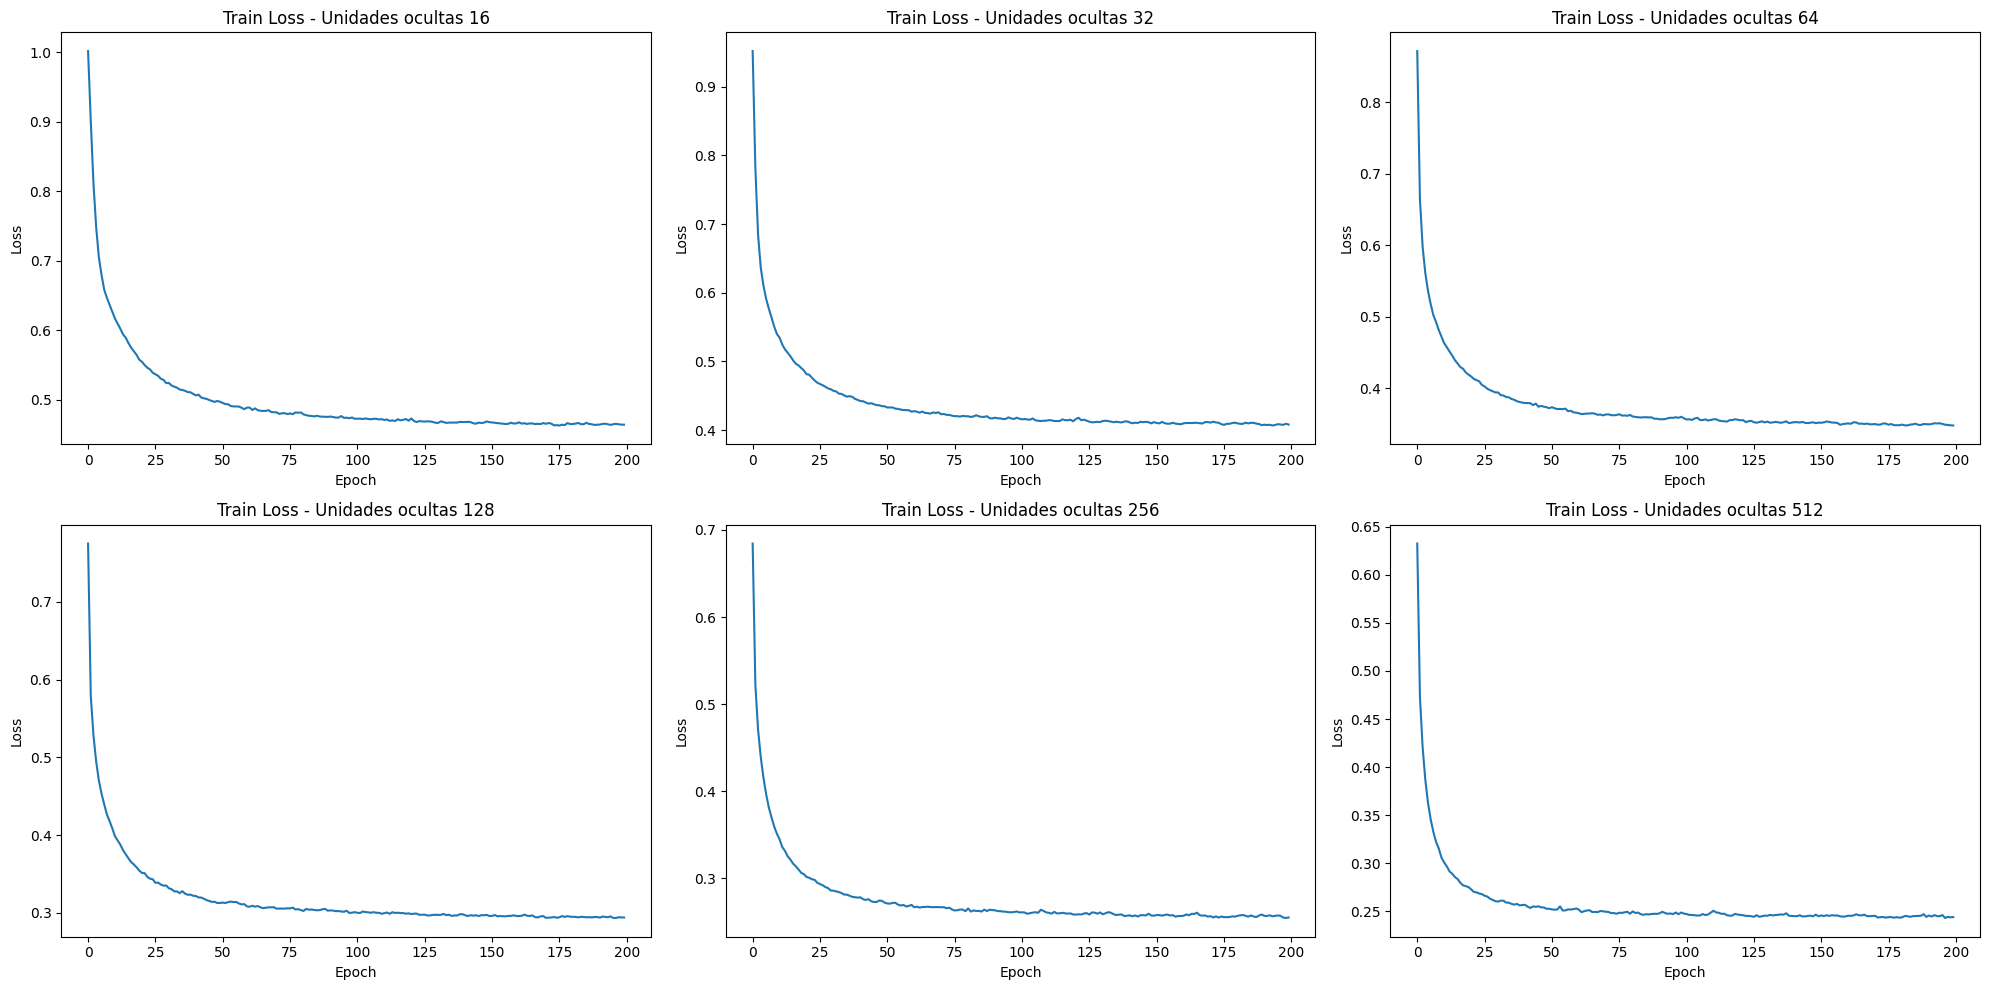

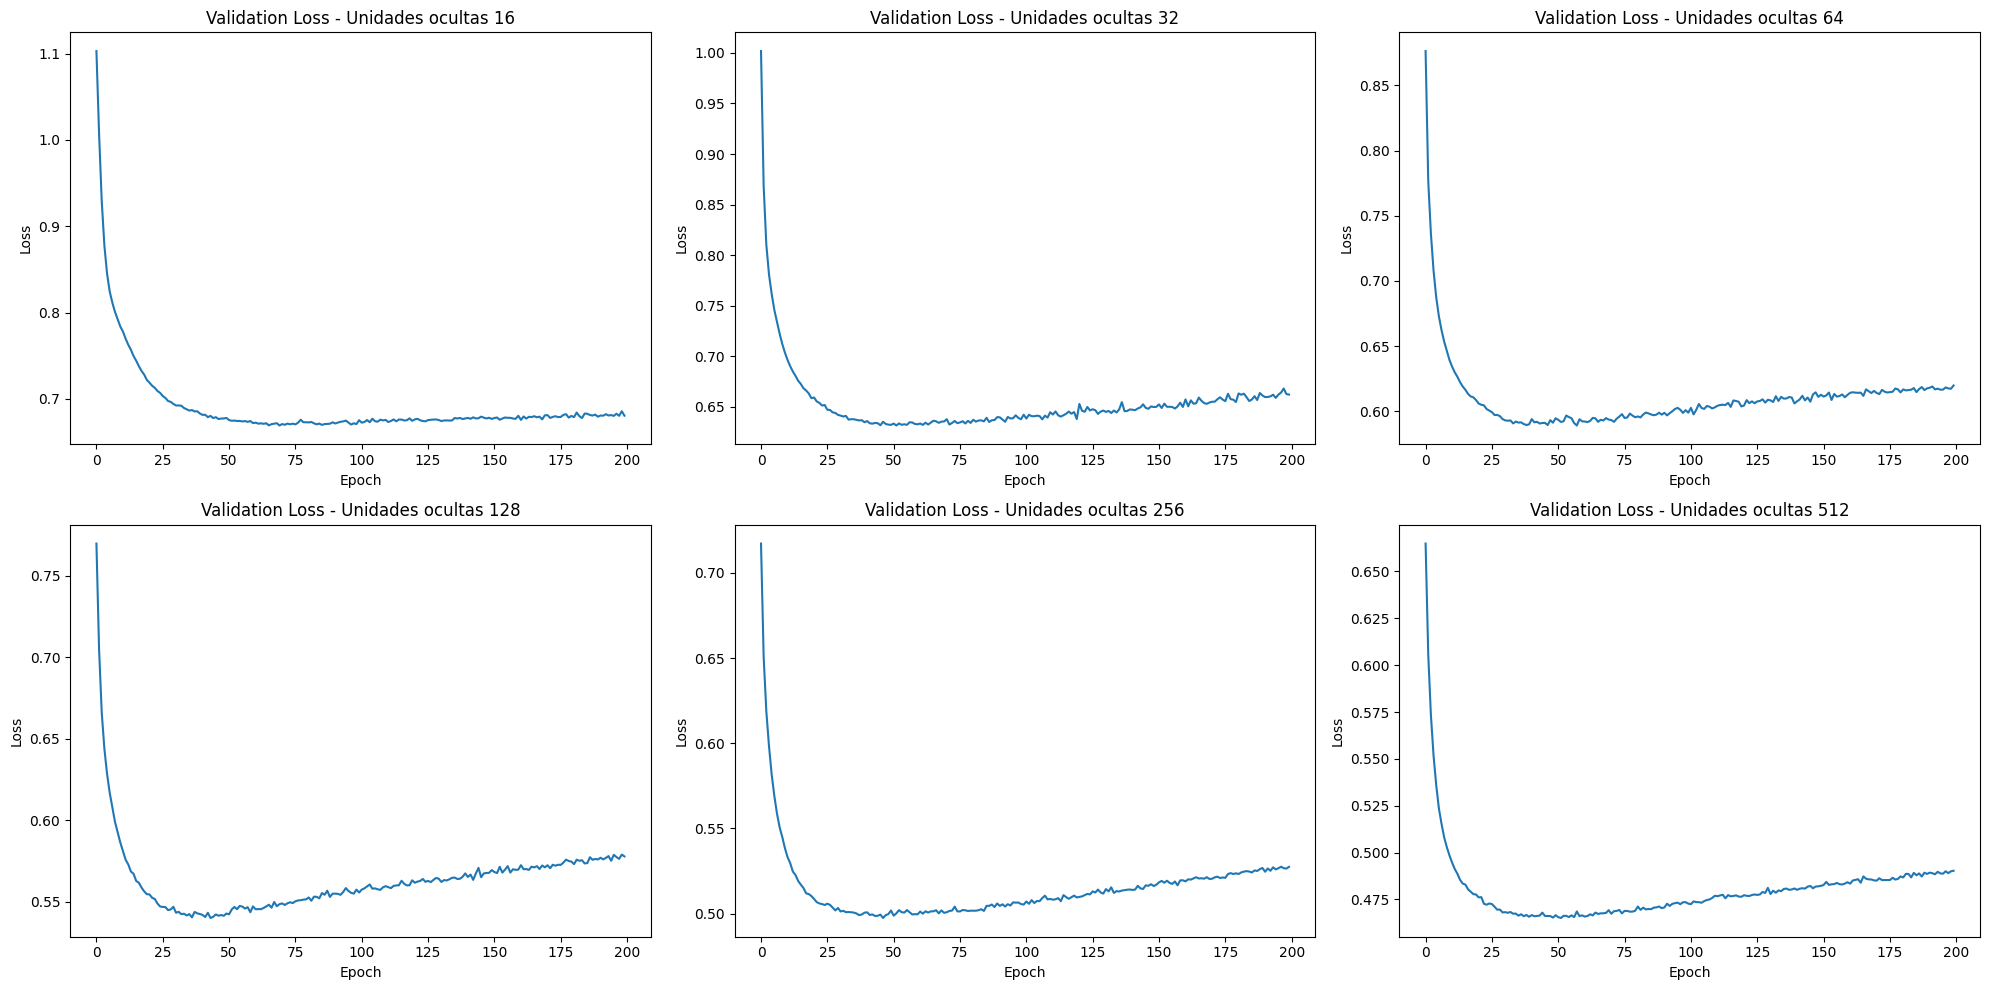

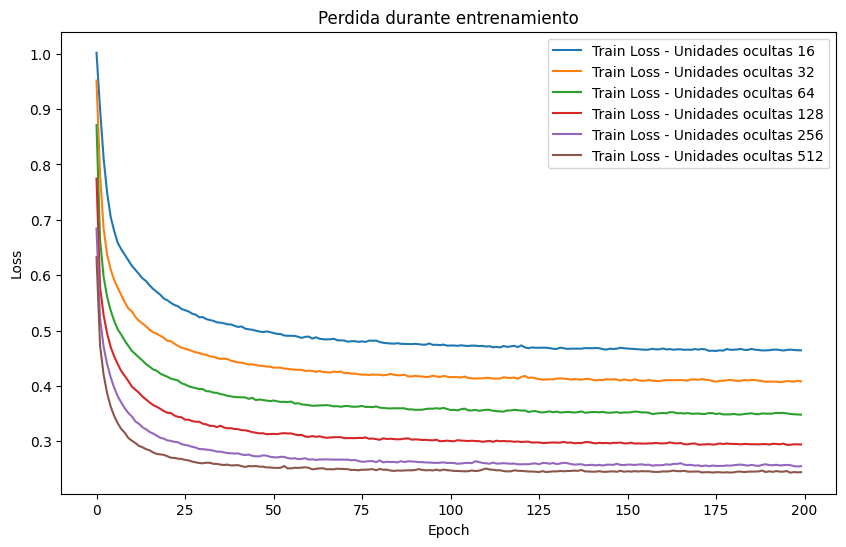

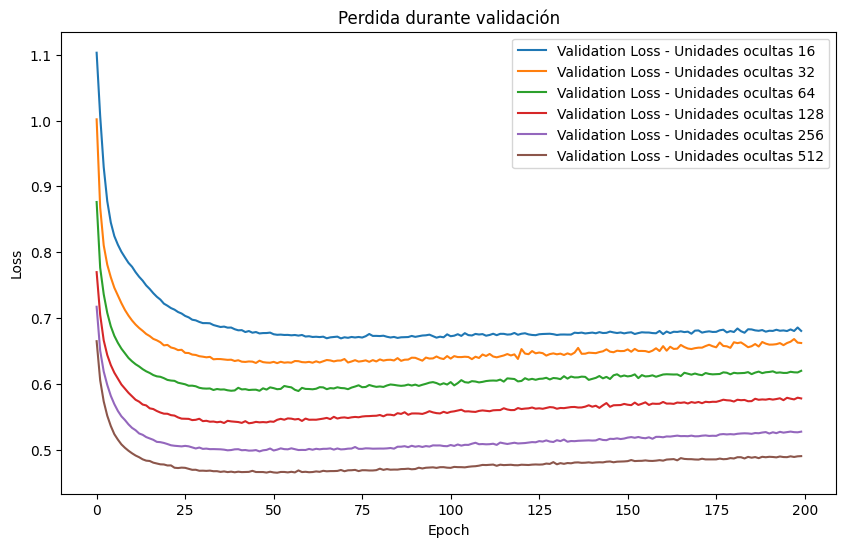

In [11]:
plt.figure(figsize=(20, 10))
for idx, hidden_dim in enumerate(hidden_sizes):
    plt.subplot(2, 3, idx+1)  # 2 filas y 3 columnas como máximo
    plt.plot(results[hidden_dim]['train_losses'], label=f'Train Loss - Unidades ocultas {hidden_dim}')
    plt.title(f'Train Loss - Unidades ocultas {hidden_dim}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))
for idx, hidden_dim in enumerate(hidden_sizes):
    plt.subplot(2, 3, idx+1)  # 2 filas y 3 columnas como máximo
    plt.plot(results[hidden_dim]['val_losses'], label=f'Validation Loss - Unidades ocultas {hidden_dim}')
    plt.title(f'Validation Loss - Unidades ocultas {hidden_dim}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# Comparar las cinco redes al mismo tiempo en una sola gráfica
plt.figure(figsize=(10, 6))

# Graficar pérdidas comparativas (entrenamiento)
for hidden_dim in hidden_sizes:
    plt.plot(results[hidden_dim]['train_losses'], label=f'Train Loss - Unidades ocultas {hidden_dim}')
plt.title('Perdida durante entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Graficar pérdidas comparativas (validación)
plt.figure(figsize=(10, 6))
for hidden_dim in hidden_sizes:
    plt.plot(results[hidden_dim]['val_losses'], label=f'Validation Loss - Unidades ocultas {hidden_dim}')
plt.title('Perdida durante validación')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Deniose Autoencoder

In [12]:
class DAE(AE):
    def forward(self, x):
        # Añadir ruido a la entrada
        noise_factor = 0.10
        noisy_x = x + noise_factor * torch.randn(x.size())
        noisy_x = torch.clip(noisy_x, 0., 1.) # Que los datos queden entre 0 y 1

        # Forward pass
        encoded = self.encoder(noisy_x)
        decoded = self.decoder(encoded)
        return decoded

In [13]:
# Entrenamiento del Autoencoder
def train_autoencoder(hidden_dim):
    input_dim = data_train_tensor.shape[1]  # Número de features
    autoencoder = AE(input_dim, hidden_dim).to(device)
    loss_fn = nn.MSELoss()  # Función de costo
    optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3)

    train_losses = []
    val_losses = []
    num_epochs = 200

    for epoch in range(num_epochs):
        epoch_loss = 0.0
        autoencoder.train()

        # Entrenamiento
        for data_batch, _ in train_loader:
            output = autoencoder(data_batch)
            loss = loss_fn(output, data_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Calcular la pérdida en el conjunto de validación
        autoencoder.eval()  # Modo de evaluación
        val_loss = 0.0
        with torch.inference_mode():
            for data_batch, _ in val_loader:
                output = autoencoder(data_batch)
                loss = loss_fn(output, data_batch)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        # Imprimir resultados cada 10 épocas
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')

    return train_losses, val_losses

In [14]:
# Entrenar el modelo con diferentes tamaños de capas ocultas
hidden_sizes = [16, 32, 64, 128, 256, 512]
results = {}

for hidden_dim in hidden_sizes:
    print(f'Unidades de la capa oculta: {hidden_dim}')
    train_losses, val_losses = train_autoencoder(hidden_dim)
    results[hidden_dim] = {'train_losses': train_losses, 'val_losses': val_losses}


Unidades de la capa oculta: 16
Epoch [10/200], Train Loss: 0.6178, Val Loss: 0.7743
Epoch [20/200], Train Loss: 0.5521, Val Loss: 0.7185
Epoch [30/200], Train Loss: 0.5251, Val Loss: 0.6936
Epoch [40/200], Train Loss: 0.5039, Val Loss: 0.6808
Epoch [50/200], Train Loss: 0.4944, Val Loss: 0.6756
Epoch [60/200], Train Loss: 0.4863, Val Loss: 0.6736
Epoch [70/200], Train Loss: 0.4807, Val Loss: 0.6767
Epoch [80/200], Train Loss: 0.4755, Val Loss: 0.6769
Epoch [90/200], Train Loss: 0.4767, Val Loss: 0.6746
Epoch [100/200], Train Loss: 0.4740, Val Loss: 0.6747
Epoch [110/200], Train Loss: 0.4711, Val Loss: 0.6770
Epoch [120/200], Train Loss: 0.4679, Val Loss: 0.6749
Epoch [130/200], Train Loss: 0.4676, Val Loss: 0.6797
Epoch [140/200], Train Loss: 0.4682, Val Loss: 0.6752
Epoch [150/200], Train Loss: 0.4659, Val Loss: 0.6774
Epoch [160/200], Train Loss: 0.4639, Val Loss: 0.6797
Epoch [170/200], Train Loss: 0.4639, Val Loss: 0.6806
Epoch [180/200], Train Loss: 0.4652, Val Loss: 0.6771
Epoch 

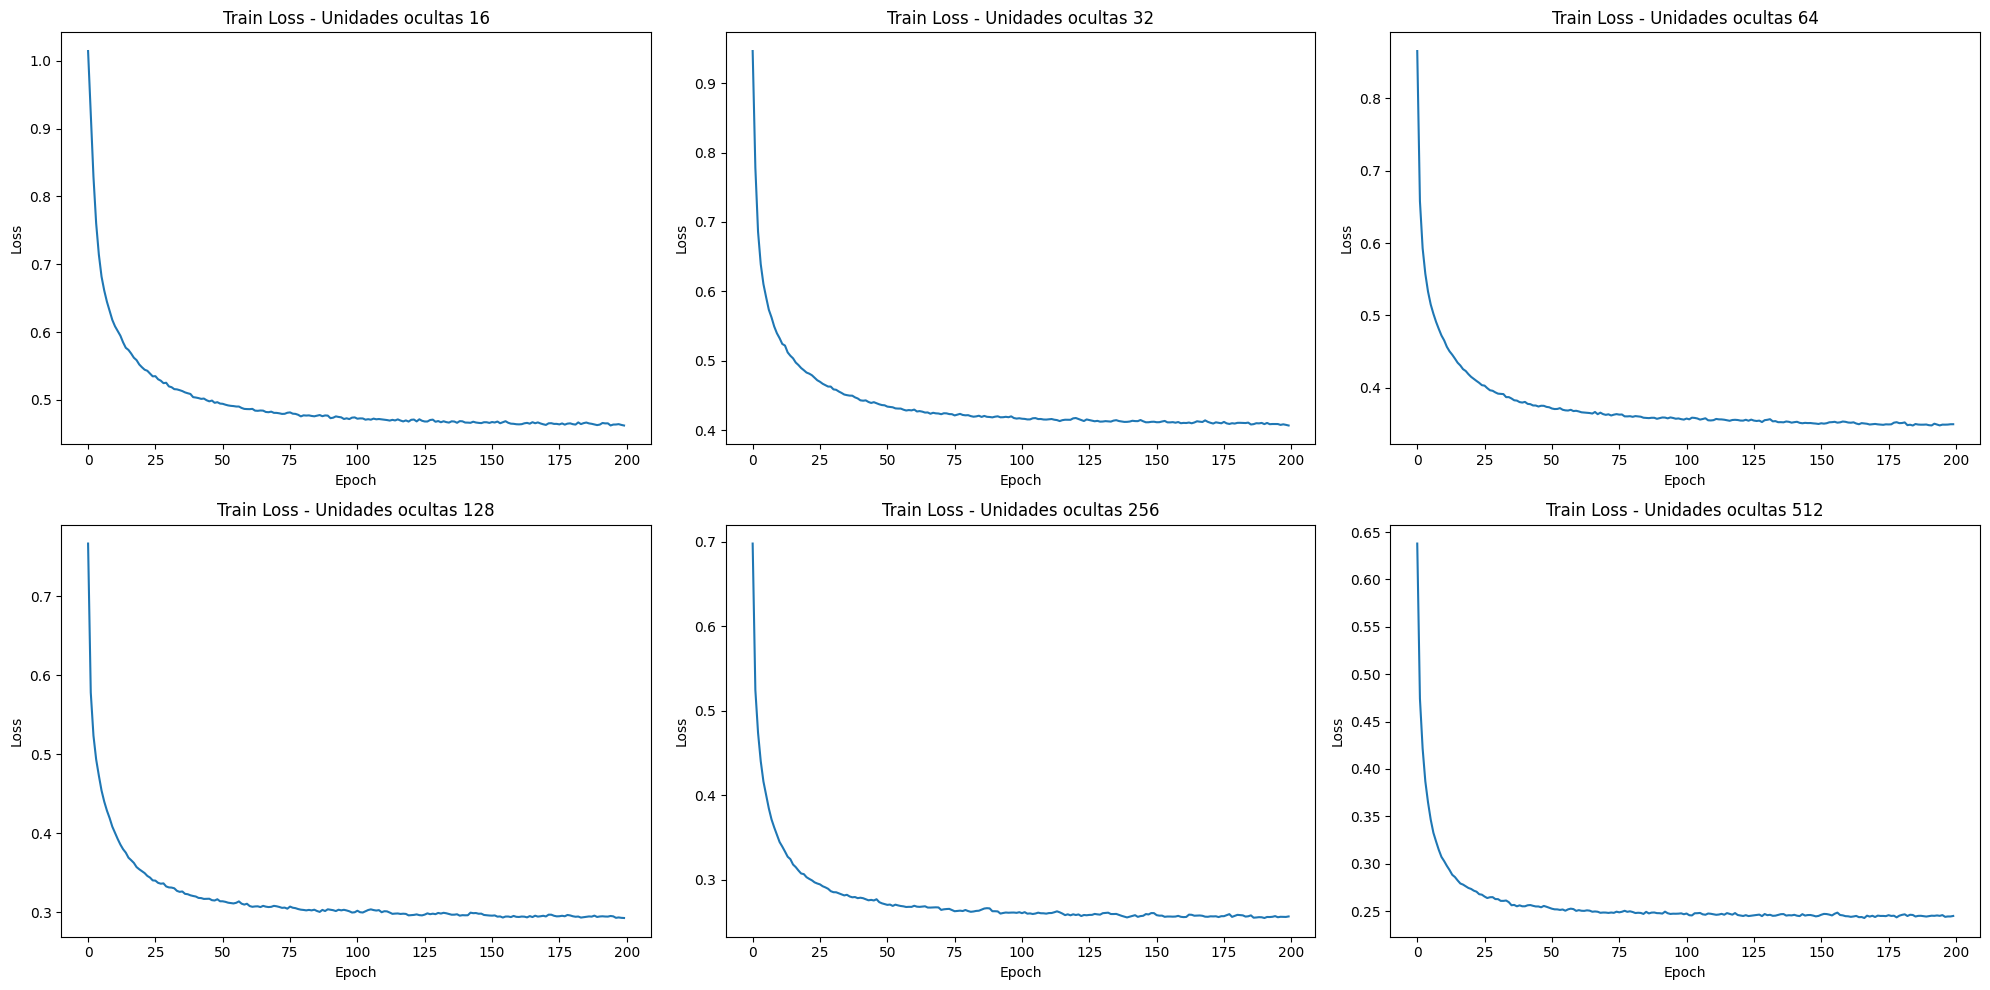

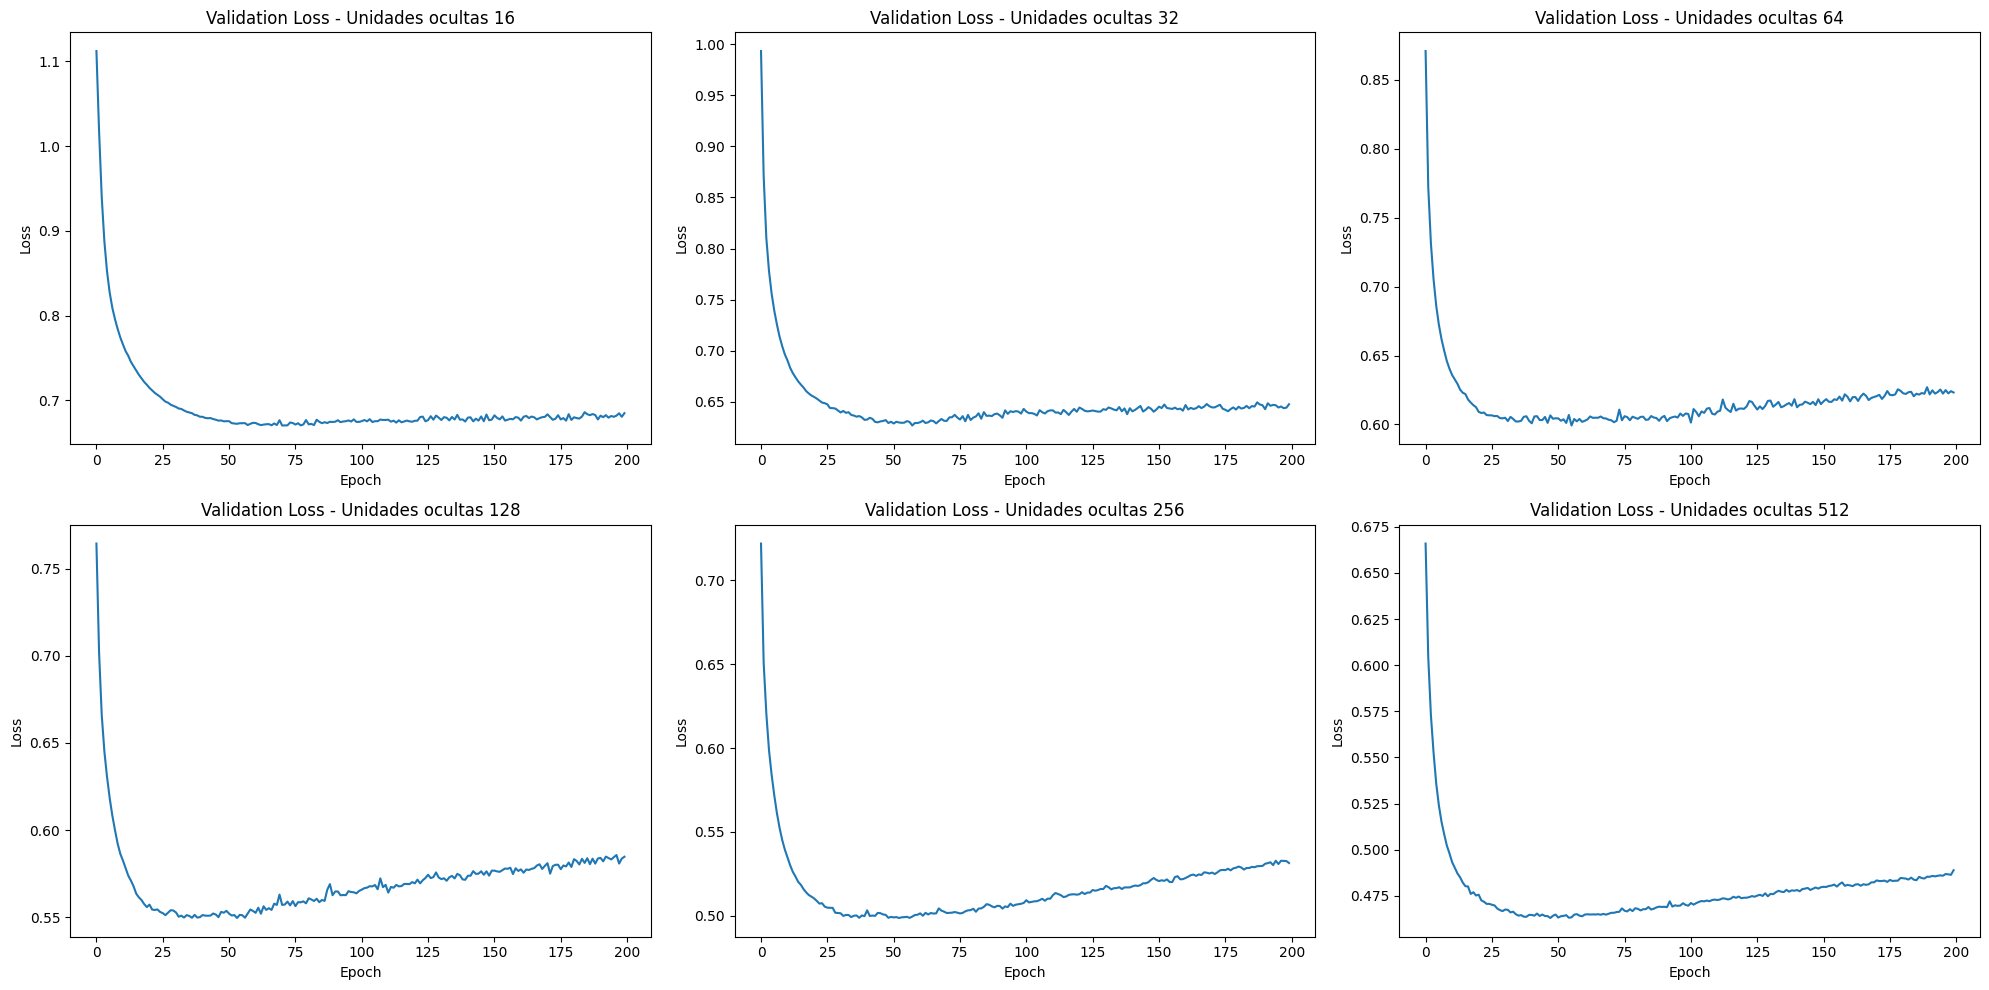

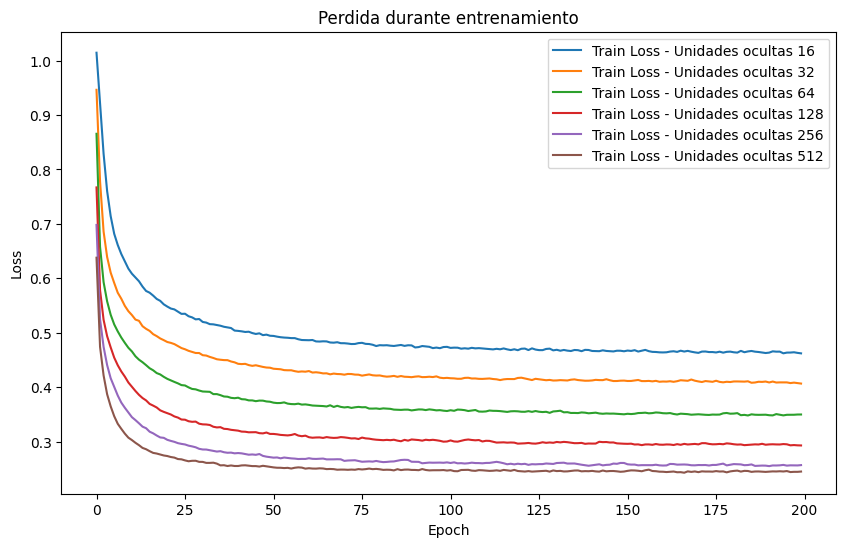

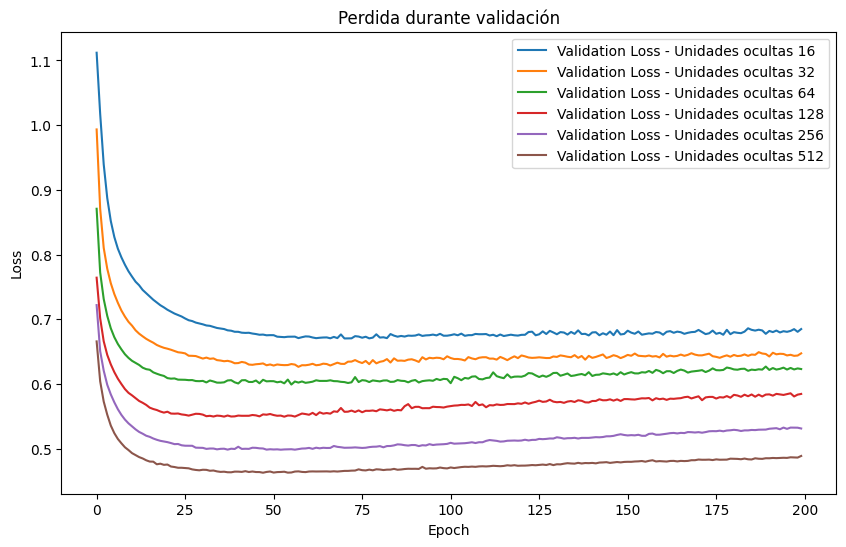

In [15]:
plt.figure(figsize=(20, 10))
for idx, hidden_dim in enumerate(hidden_sizes):
    plt.subplot(2, 3, idx+1)  # 2 filas y 3 columnas como máximo
    plt.plot(results[hidden_dim]['train_losses'], label=f'Train Loss - Unidades ocultas {hidden_dim}')
    plt.title(f'Train Loss - Unidades ocultas {hidden_dim}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))
for idx, hidden_dim in enumerate(hidden_sizes):
    plt.subplot(2, 3, idx+1)  # 2 filas y 3 columnas como máximo
    plt.plot(results[hidden_dim]['val_losses'], label=f'Validation Loss - Unidades ocultas {hidden_dim}')
    plt.title(f'Validation Loss - Unidades ocultas {hidden_dim}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# Comparar las cinco redes al mismo tiempo en una sola gráfica
plt.figure(figsize=(10, 6))

# Graficar pérdidas comparativas (entrenamiento)
for hidden_dim in hidden_sizes:
    plt.plot(results[hidden_dim]['train_losses'], label=f'Train Loss - Unidades ocultas {hidden_dim}')
plt.title('Perdida durante entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Graficar pérdidas comparativas (validación)
plt.figure(figsize=(10, 6))
for hidden_dim in hidden_sizes:
    plt.plot(results[hidden_dim]['val_losses'], label=f'Validation Loss - Unidades ocultas {hidden_dim}')
plt.title('Perdida durante validación')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Sparse Autoencoder

In [16]:
class SAE(nn.Module):
    def __init__(self, vsize, hsize):
        super(SAE, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(vsize, hsize),
            nn.ReLU()
        )

        self.decoder = nn.Linear(hsize, vsize)
        
        self.reg = 0 # Regularización L1 

    def forward(self, x):
        h = self.encoder(x)
        self.reg = h.sum()  # Regularización L1
        return self.decoder(h)


In [17]:
def train_sparse_autoencoder(hidden_dim, regularization_factor=1e-3):
    input_dim = data_train_tensor.shape[1]  # Features
    autoencoder = SAE(input_dim, hidden_dim).to(device)
    loss_fn = nn.MSELoss()  # Función de costo
    optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3)

    train_losses = []
    val_losses = []
    num_epochs = 200

    for epoch in range(num_epochs):
        epoch_loss = 0.0
        autoencoder.train()

        for data_batch, _ in train_loader:
            output = autoencoder(data_batch)
            loss = loss_fn(output, data_batch)

            # Regularización L1
            total_loss = loss + regularization_factor * autoencoder.reg

            optimizer.zero_grad()
            total_loss.backward()
            optimizer.step()

            epoch_loss += total_loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validación
        autoencoder.eval()
        val_loss = 0.0
        with torch.inference_mode():
            for data_batch, _ in val_loader:
                output = autoencoder(data_batch)
                loss = loss_fn(output, data_batch)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        # Imprimir resultados cada 10 épocas
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')

    return train_losses, val_losses

In [18]:
# Entrenar el modelo con diferentes tamaños de capas ocultas
hidden_sizes = [16, 32, 64, 128, 256, 512]
results = {}

for hidden_dim in hidden_sizes:
    print(f'Unidades de la capa oculta: {hidden_dim}')
    train_losses, val_losses = train_sparse_autoencoder(hidden_dim)
    results[hidden_dim] = {'train_losses': train_losses, 'val_losses': val_losses}


Unidades de la capa oculta: 16
Epoch [10/200], Train Loss: 0.8018, Val Loss: 0.8250
Epoch [20/200], Train Loss: 0.6951, Val Loss: 0.7250
Epoch [30/200], Train Loss: 0.6457, Val Loss: 0.6754
Epoch [40/200], Train Loss: 0.6155, Val Loss: 0.6522
Epoch [50/200], Train Loss: 0.5987, Val Loss: 0.6389
Epoch [60/200], Train Loss: 0.5865, Val Loss: 0.6318
Epoch [70/200], Train Loss: 0.5763, Val Loss: 0.6289
Epoch [80/200], Train Loss: 0.5727, Val Loss: 0.6369
Epoch [90/200], Train Loss: 0.5670, Val Loss: 0.6328
Epoch [100/200], Train Loss: 0.5662, Val Loss: 0.6372
Epoch [110/200], Train Loss: 0.5628, Val Loss: 0.6585
Epoch [120/200], Train Loss: 0.5496, Val Loss: 0.6433
Epoch [130/200], Train Loss: 0.5521, Val Loss: 0.6451
Epoch [140/200], Train Loss: 0.5547, Val Loss: 0.6375
Epoch [150/200], Train Loss: 0.5448, Val Loss: 0.6378
Epoch [160/200], Train Loss: 0.5444, Val Loss: 0.6391
Epoch [170/200], Train Loss: 0.5375, Val Loss: 0.6489
Epoch [180/200], Train Loss: 0.5376, Val Loss: 0.6437
Epoch 

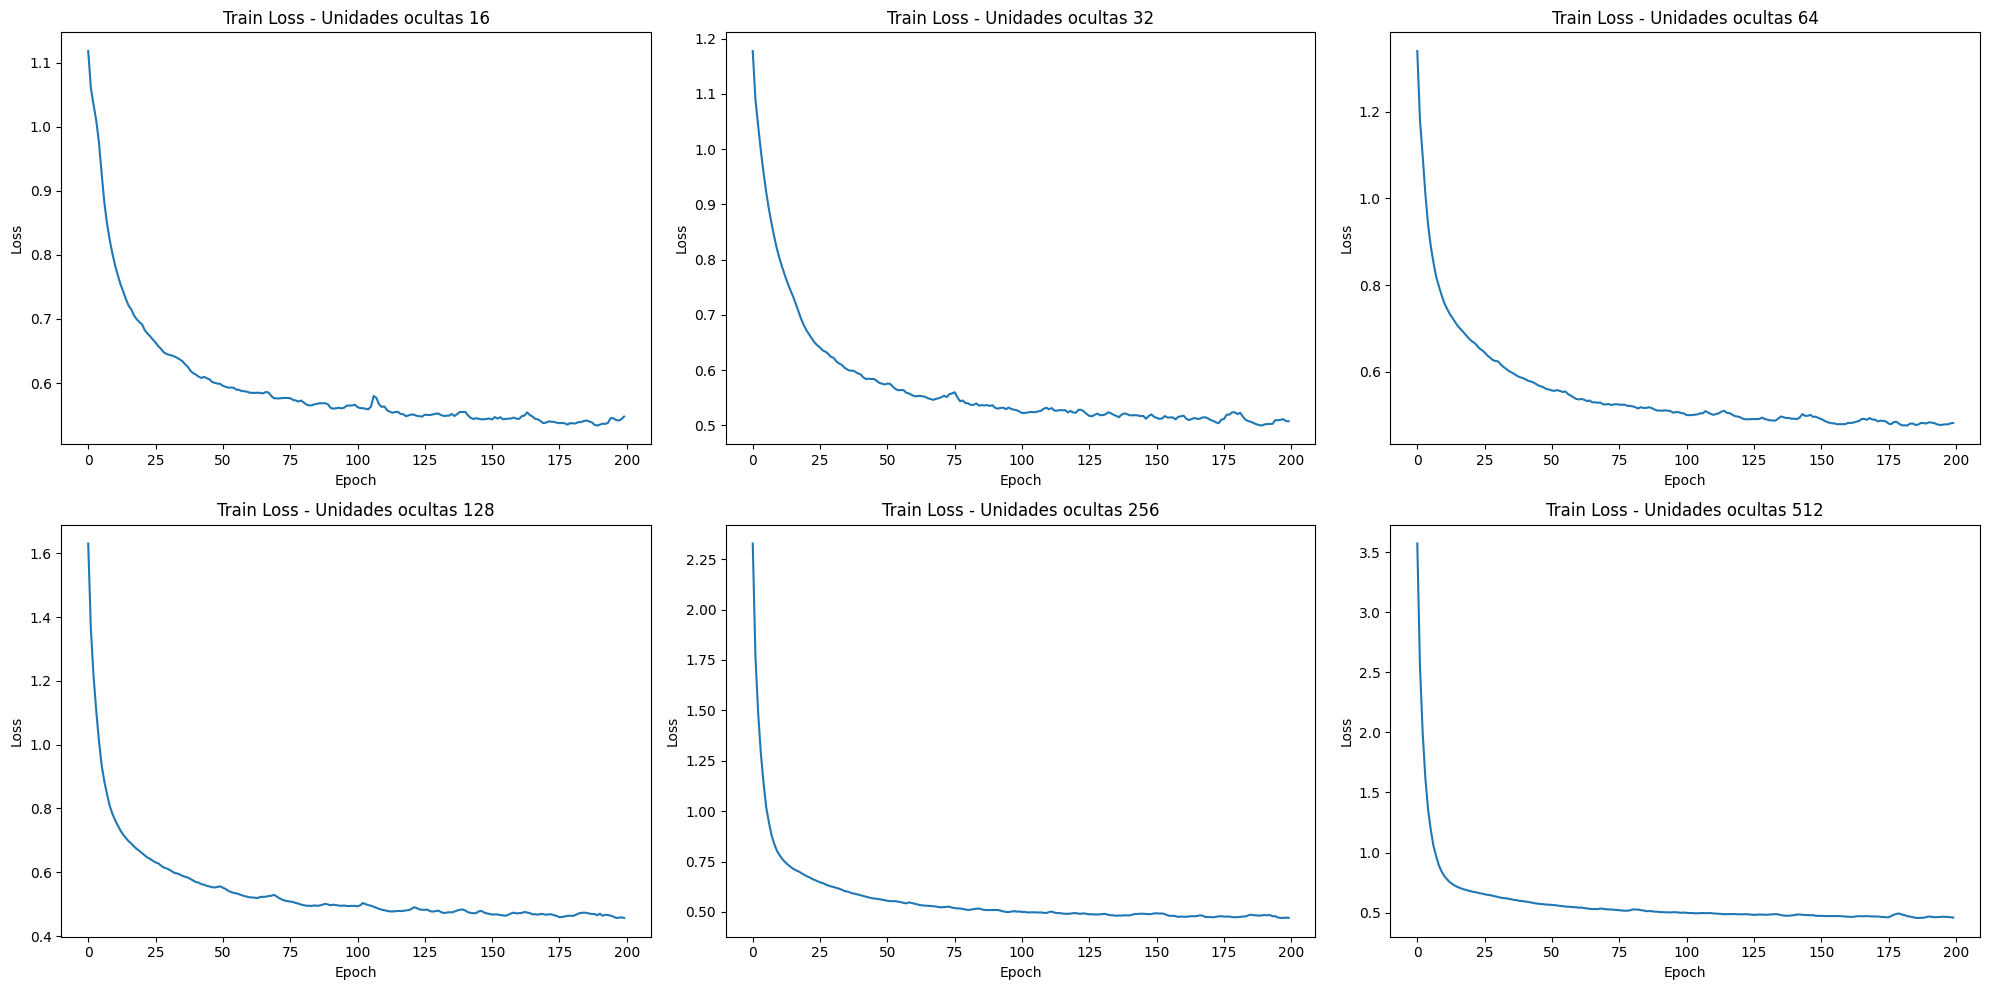

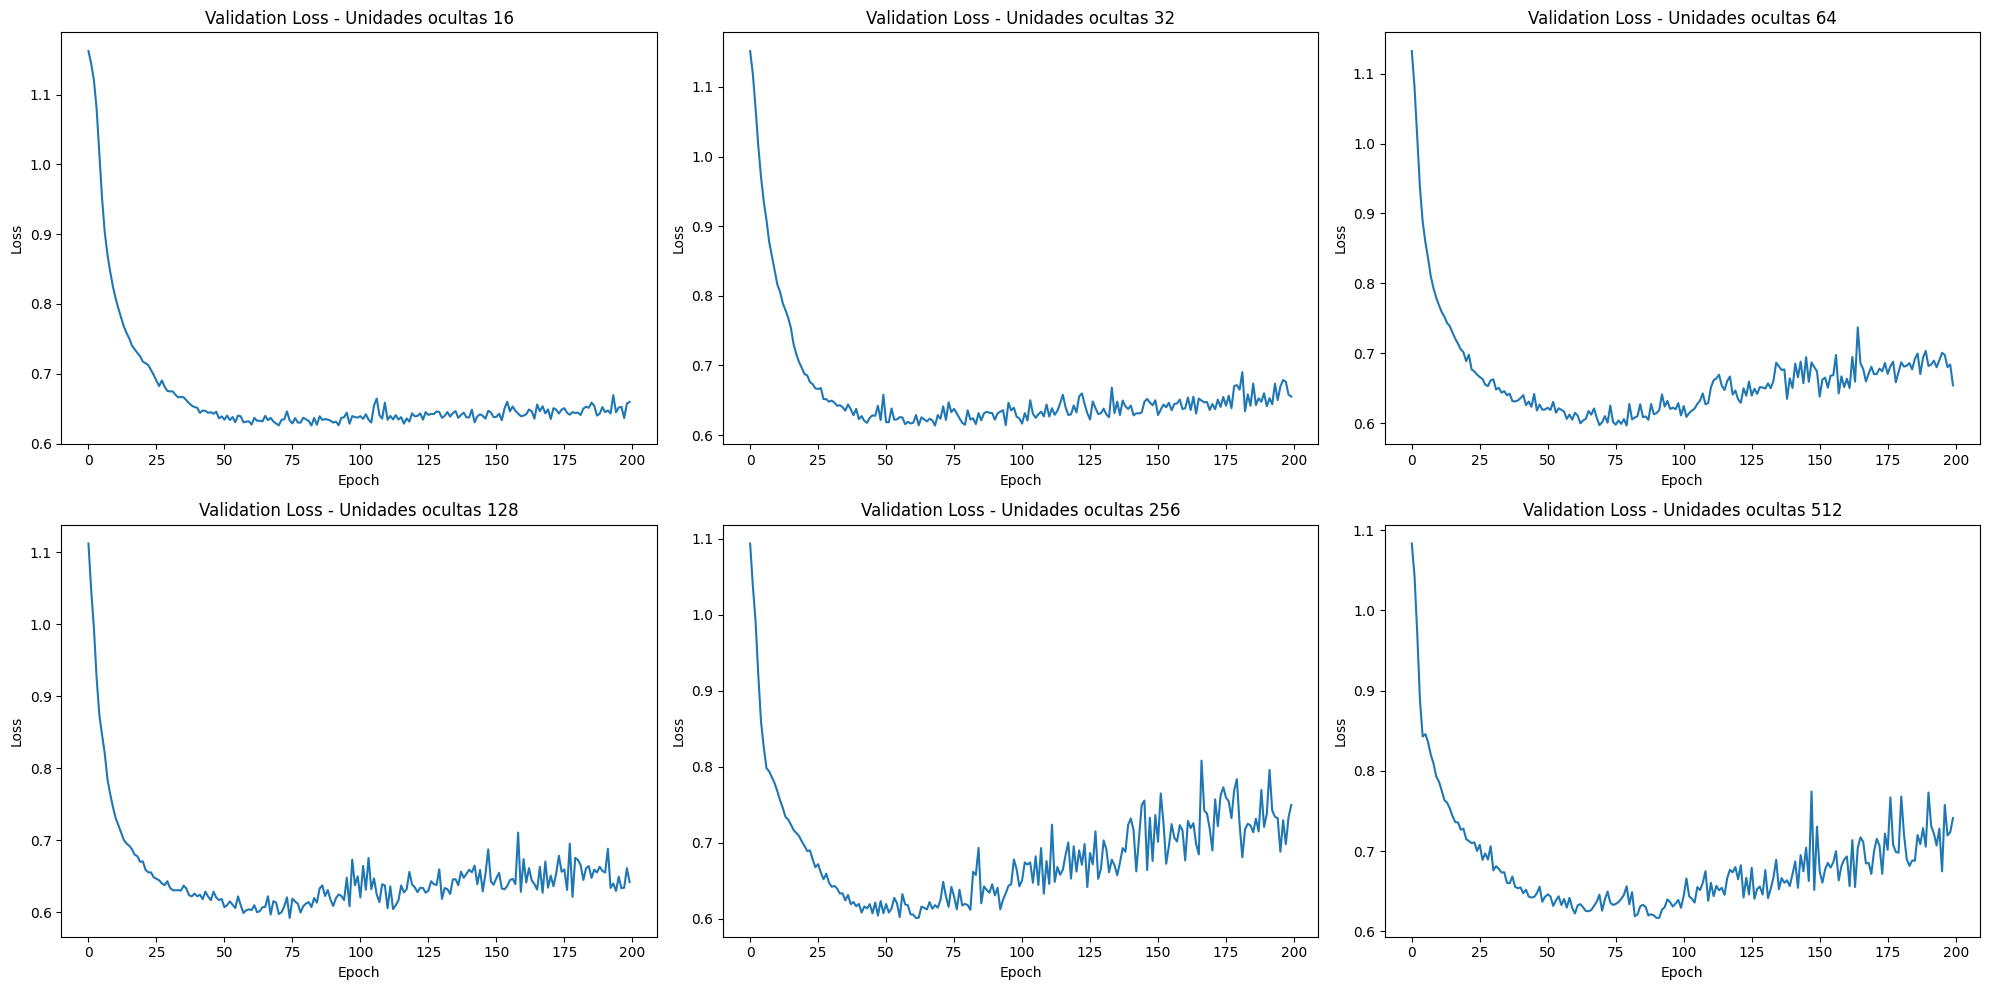

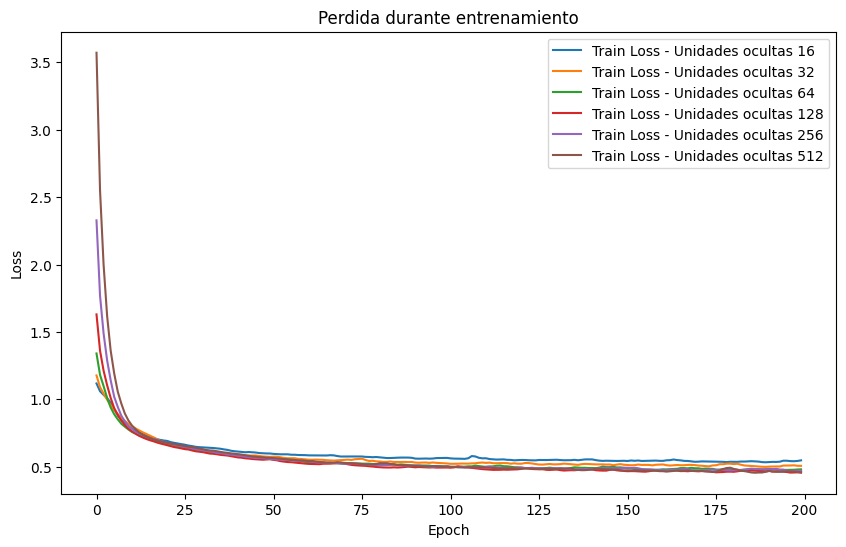

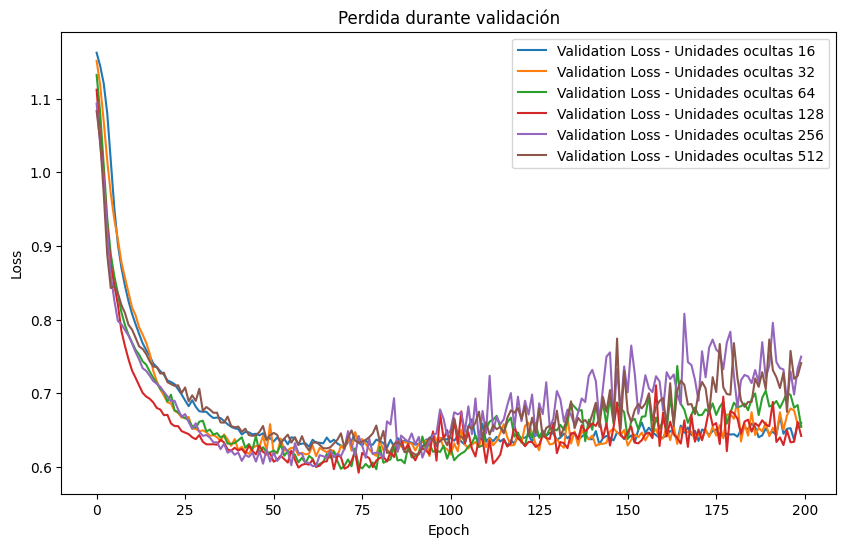

In [19]:
plt.figure(figsize=(20, 10))
for idx, hidden_dim in enumerate(hidden_sizes):
    plt.subplot(2, 3, idx+1)  # 2 filas y 3 columnas como máximo
    plt.plot(results[hidden_dim]['train_losses'], label=f'Train Loss - Unidades ocultas {hidden_dim}')
    plt.title(f'Train Loss - Unidades ocultas {hidden_dim}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))
for idx, hidden_dim in enumerate(hidden_sizes):
    plt.subplot(2, 3, idx+1)  # 2 filas y 3 columnas como máximo
    plt.plot(results[hidden_dim]['val_losses'], label=f'Validation Loss - Unidades ocultas {hidden_dim}')
    plt.title(f'Validation Loss - Unidades ocultas {hidden_dim}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# Comparar las cinco redes al mismo tiempo en una sola gráfica
plt.figure(figsize=(10, 6))

# Graficar pérdidas comparativas (entrenamiento)
for hidden_dim in hidden_sizes:
    plt.plot(results[hidden_dim]['train_losses'], label=f'Train Loss - Unidades ocultas {hidden_dim}')
plt.title('Perdida durante entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Graficar pérdidas comparativas (validación)
plt.figure(figsize=(10, 6))
for hidden_dim in hidden_sizes:
    plt.plot(results[hidden_dim]['val_losses'], label=f'Validation Loss - Unidades ocultas {hidden_dim}')
plt.title('Perdida durante validación')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
# Entrenar el modelo con diferentes tamaños de capas ocultas
hidden_sizes = [1024, 2048, 4096]
results = {}

for hidden_dim in hidden_sizes:
    print(f'Unidades de la capa oculta: {hidden_dim}')
    train_losses, val_losses = train_sparse_autoencoder(hidden_dim)
    results[hidden_dim] = {'train_losses': train_losses, 'val_losses': val_losses}


Unidades de la capa oculta: 1024
Epoch [10/200], Train Loss: 0.9101, Val Loss: 0.8182
Epoch [20/200], Train Loss: 0.6851, Val Loss: 0.7400
Epoch [30/200], Train Loss: 0.6365, Val Loss: 0.7021
Epoch [40/200], Train Loss: 0.5939, Val Loss: 0.6660
Epoch [50/200], Train Loss: 0.5619, Val Loss: 0.6464
Epoch [60/200], Train Loss: 0.5336, Val Loss: 0.6353
Epoch [70/200], Train Loss: 0.5153, Val Loss: 0.6641
Epoch [80/200], Train Loss: 0.5010, Val Loss: 0.6182
Epoch [90/200], Train Loss: 0.4959, Val Loss: 0.6322
Epoch [100/200], Train Loss: 0.4819, Val Loss: 0.6463
Epoch [110/200], Train Loss: 0.4860, Val Loss: 0.6195
Epoch [120/200], Train Loss: 0.4686, Val Loss: 0.6642
Epoch [130/200], Train Loss: 0.4714, Val Loss: 0.6440
Epoch [140/200], Train Loss: 0.4604, Val Loss: 0.6389
Epoch [150/200], Train Loss: 0.4546, Val Loss: 0.6581
Epoch [160/200], Train Loss: 0.4589, Val Loss: 0.6479
Epoch [170/200], Train Loss: 0.4531, Val Loss: 0.6415
Epoch [180/200], Train Loss: 0.4533, Val Loss: 0.6882
Epoc

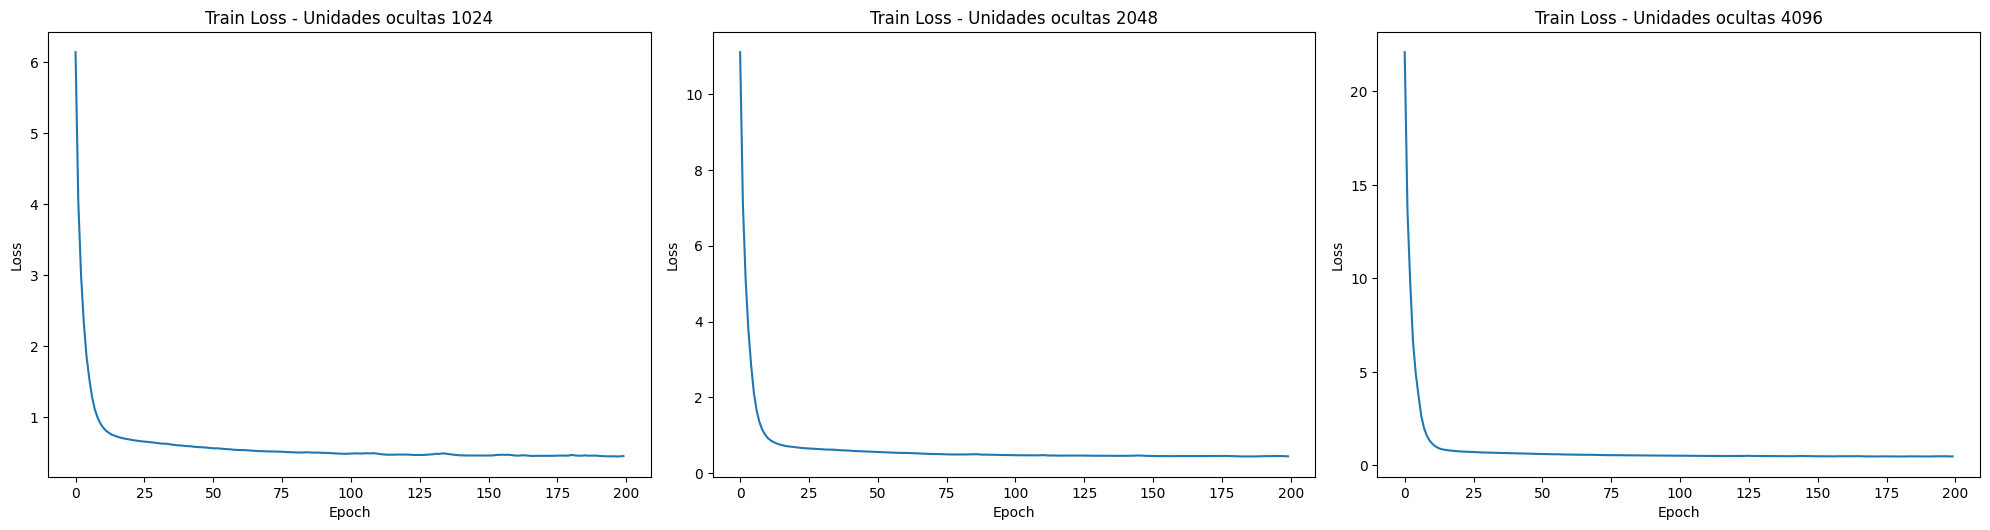

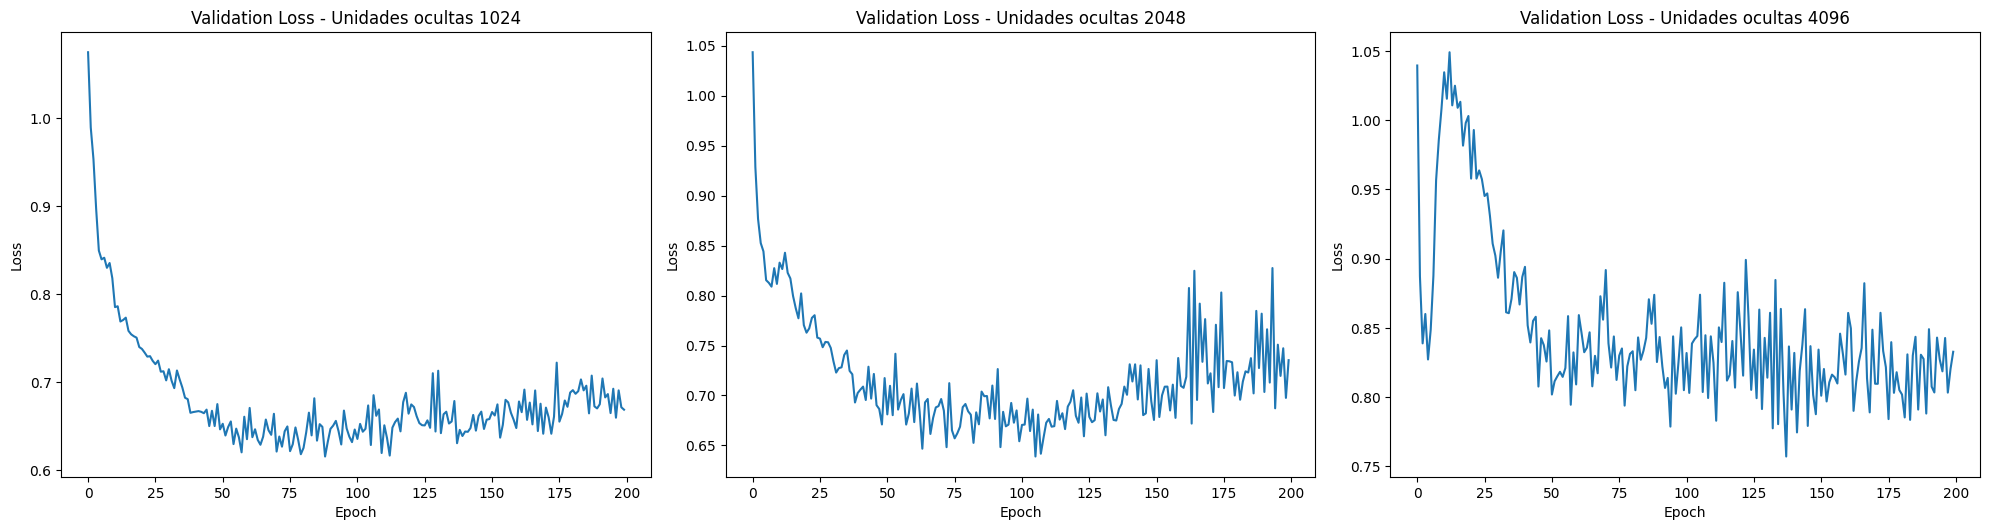

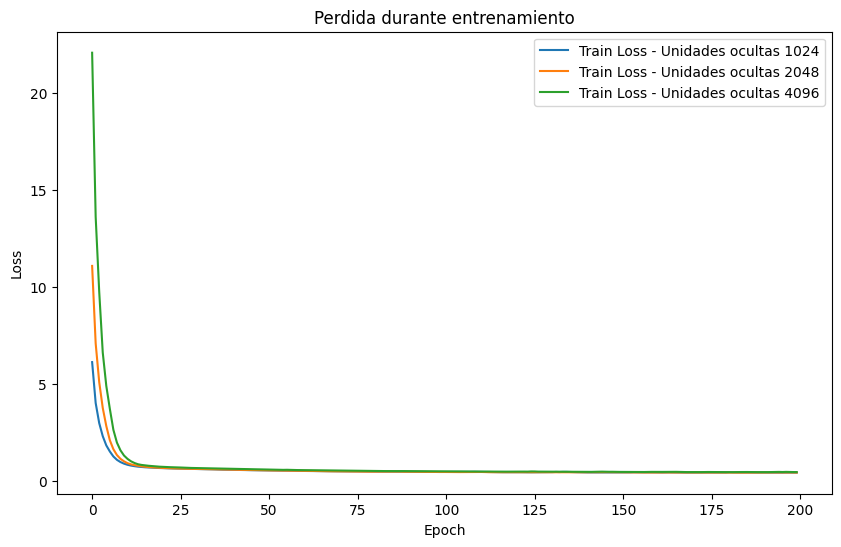

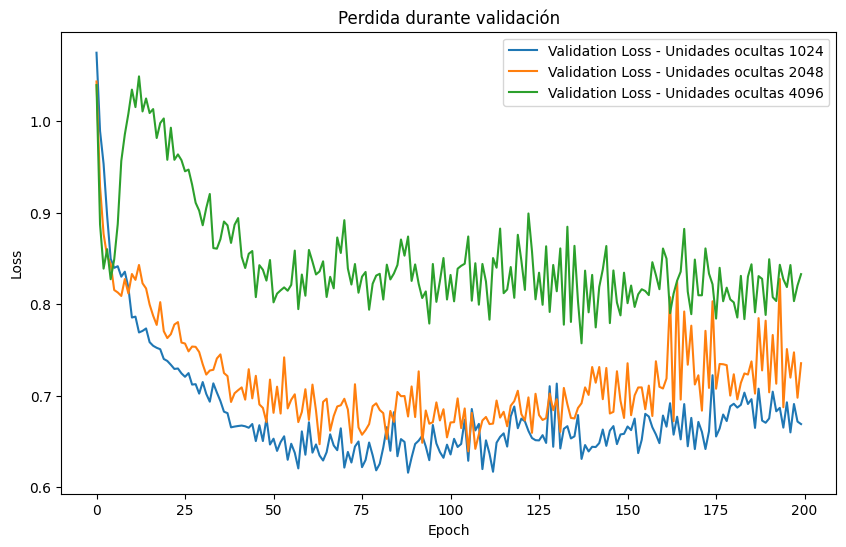

In [21]:
plt.figure(figsize=(20, 10))
for idx, hidden_dim in enumerate(hidden_sizes):
    plt.subplot(2, 3, idx+1)
    plt.plot(results[hidden_dim]['train_losses'], label=f'Train Loss - Unidades ocultas {hidden_dim}')
    plt.title(f'Train Loss - Unidades ocultas {hidden_dim}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))
for idx, hidden_dim in enumerate(hidden_sizes):
    plt.subplot(2, 3, idx+1)
    plt.plot(results[hidden_dim]['val_losses'], label=f'Validation Loss - Unidades ocultas {hidden_dim}')
    plt.title(f'Validation Loss - Unidades ocultas {hidden_dim}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# Comparar las cinco redes al mismo tiempo en una sola gráfica
plt.figure(figsize=(10, 6))

# Graficar pérdidas comparativas (entrenamiento)
for hidden_dim in hidden_sizes:
    plt.plot(results[hidden_dim]['train_losses'], label=f'Train Loss - Unidades ocultas {hidden_dim}')
plt.title('Perdida durante entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Graficar pérdidas comparativas (validación)
plt.figure(figsize=(10, 6))
for hidden_dim in hidden_sizes:
    plt.plot(results[hidden_dim]['val_losses'], label=f'Validation Loss - Unidades ocultas {hidden_dim}')
plt.title('Perdida durante validación')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()